
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression Code Assignement

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_1/Session_1_Linear_Regression_exercise_NOTSOLVED.ipynb)


An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Code to avoid cell auto-scrolling

In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [45]:
customers = pd.read_csv('Ecommerce_Customers.csv')
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [46]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






In [358]:
#PUT YOUR CODE HERE
customers_ = customers[customers.columns[3:]]

## Add further cells in case you need



In [359]:
customers_.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


#### Check Missing values

In [360]:
#PUT YOUR CODE HERE
customers_.isnull().sum()

## Add further cells in case you need


Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### Check distribution of the target variable

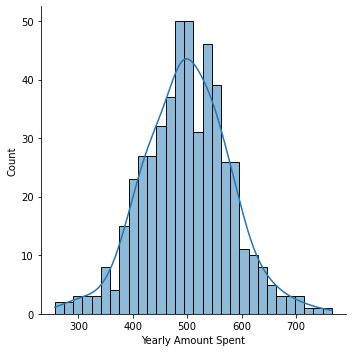

In [361]:
#PUT YOUR CODE HERE
sns.displot(data=customers_, x="Yearly Amount Spent", bins=30, kde=True)
## Add further cells in case you need



#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

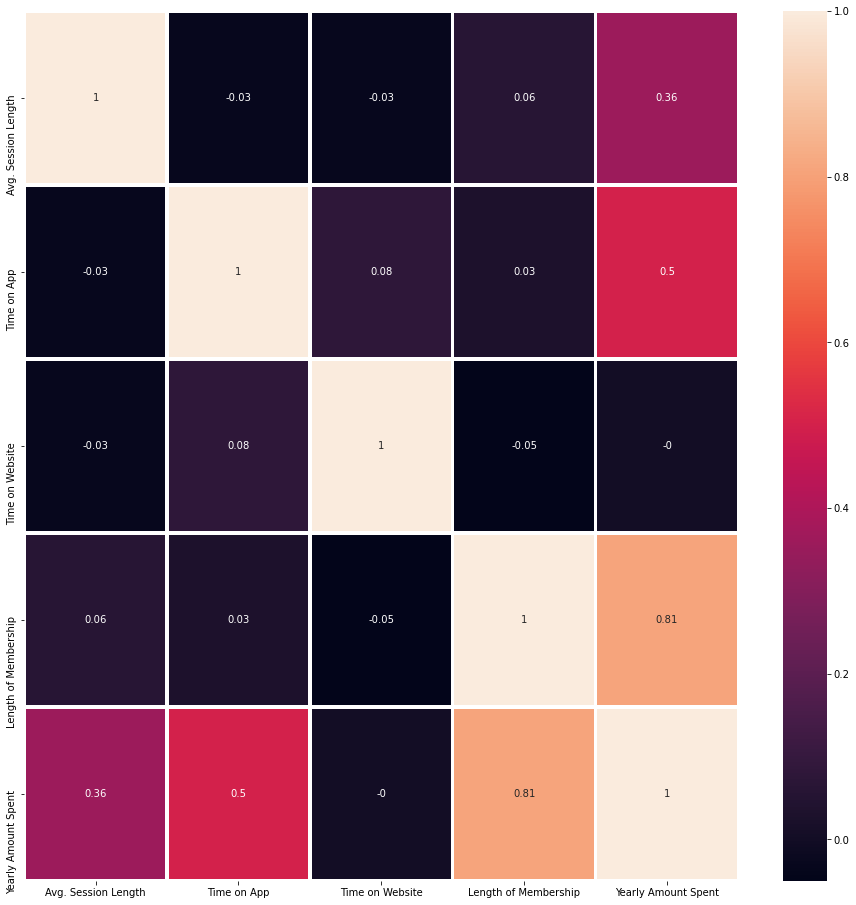

In [362]:
#PUT YOUR CODE HERE
correlation_matrix_ = customers_.corr()
correlation_matrix_ = correlation_matrix_.round(decimals=2)

plt.figure(figsize = (16,16))
sns.heatmap(correlation_matrix_, linewidth=2.5, annot=True)
plt.show()
## Add further cells in case you need



In [363]:
correlation_matrix_

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.00,-0.03,-0.03,0.06,0.36
Time on App,-0.03,1.00,0.08,0.03,0.50
Time on Website,-0.03,0.08,1.00,-0.05,-0.00
Length of Membership,0.06,0.03,-0.05,1.00,0.81
Yearly Amount Spent,0.36,0.50,-0.00,0.81,1.00


## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Simple linear regression

In [364]:
# Prepare data for training

#PUT YOUR CODE HERE
X = customers_[['Time on App']]
Y = customers_['Yearly Amount Spent']

## Add further cells in case you need



### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [365]:
#PUT YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

## Add further cells in case you need


(400, 1)
(100, 1)
(400,)
(100,)


### Training of the model

In [366]:
#PUT YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

## Add further cells in case you need



LinearRegression()

#### Print the coeficients of the model

In [367]:
#PUT YOUR CODE HERE
coeff_df = pd.DataFrame(lin_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

## Add further cells in case you need



,Coefficient
Time on App,40.66564


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

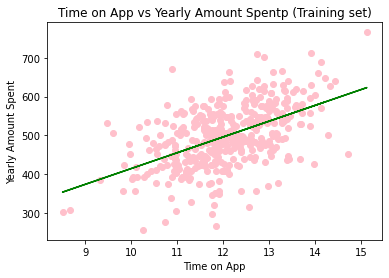

In [368]:
#PUT YOUR CODE HERE
plt.scatter(X_train, Y_train, color = "pink")
plt.plot(X_train, lin_model.predict(X_train), color = "green")
plt.title("Time on App vs Yearly Amount Spentp (Training set)")
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.show()

## Add further cells in case you need




### Evaluate the model on the test set

    - Make some plots you think maybe useful to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

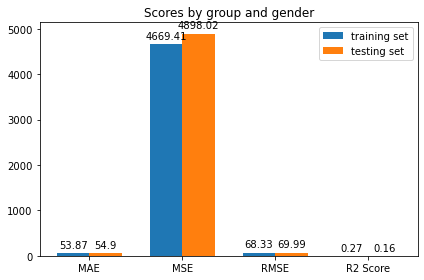

In [369]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

y_train_predict = lin_model.predict(X_train)

lin_mae = round(mean_absolute_error(Y_train, y_train_predict),2)
lin_mse = round(mean_squared_error(Y_train, y_train_predict), 2)
lin_rmse = round(np.sqrt(lin_mse),2)
lin_r2 = round(r2_score(Y_train, y_train_predict),2)

training_set = [lin_mae, lin_mse, lin_rmse, lin_r2]


y_test_predict = lin_model.predict(X_test)

test_lin_mae = round(mean_absolute_error(Y_test, y_test_predict),2)
test_lin_mse = round(mean_squared_error(Y_test, y_test_predict),2)
test_lin_rmse = round(np.sqrt(test_lin_mse),2)
test_lin_r2 = round(r2_score(Y_test, y_test_predict),2)

testing_set = [test_lin_mae, test_lin_mse, test_lin_rmse, test_lin_r2]


labels = ['MAE', 'MSE', 'RMSE', 'R2 Score']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_set, width, label='training set')
rects2 = ax.bar(x + width/2, testing_set, width, label='testing set')


ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()





/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


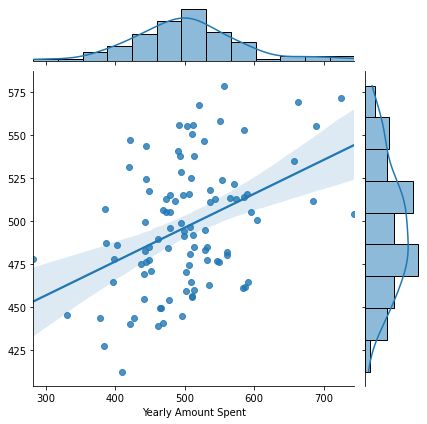

In [370]:
sns.jointplot(Y_test, y_test_predict, kind="reg")

## Multivariate Model

In [371]:
# Prepare data for training

#PUT YOUR CODE HERE
s1 = pd.Series(customers_['Time on App'])
s2 = pd.Series(customers_['Length of Membership'])
df = pd.concat([s1, s2], axis=1)

X = df
Y = customers_['Yearly Amount Spent']

## Add further cells in case you need



### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [372]:
#PUT YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

## Add further cells in case you need




(400, 2)
(100, 2)
(400,)
(100,)


### Training of the model

In [373]:
#PUT YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
## Add further cells in case you need


LinearRegression()

#### Print the coeficients of the model

In [374]:
#PUT YOUR CODE HERE
coeff_df = pd.DataFrame(lin_model.coef_,X.columns,columns=['Coefficient'])
coeff_df
## Add further cells in case you need


,Coefficient
Time on App,38.559704
Length of Membership,63.964302


### Evaluate the model on the test set

    - Make some plots you think maybe useful to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

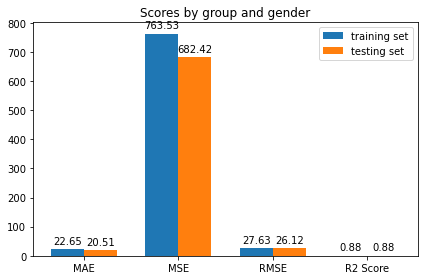

In [375]:
#PUT YOUR CODE HERE
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

y_train_predict = lin_model.predict(X_train)

lin_mae = round(mean_absolute_error(Y_train, y_train_predict),2)
lin_mse = round(mean_squared_error(Y_train, y_train_predict), 2)
lin_rmse = round(np.sqrt(lin_mse),2)
lin_r2 = round(r2_score(Y_train, y_train_predict),2)

training_set = [lin_mae, lin_mse, lin_rmse, lin_r2]


y_test_predict = lin_model.predict(X_test)

test_lin_mae = round(mean_absolute_error(Y_test, y_test_predict),2)
test_lin_mse = round(mean_squared_error(Y_test, y_test_predict),2)
test_lin_rmse = round(np.sqrt(test_lin_mse),2)
test_lin_r2 = round(r2_score(Y_test, y_test_predict),2)

testing_set = [test_lin_mae, test_lin_mse, test_lin_rmse, test_lin_r2]


labels = ['MAE', 'MSE', 'RMSE', 'R2 Score']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_set, width, label='training set')
rects2 = ax.bar(x + width/2, testing_set, width, label='testing set')


ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


## Add further cells in case you need



/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


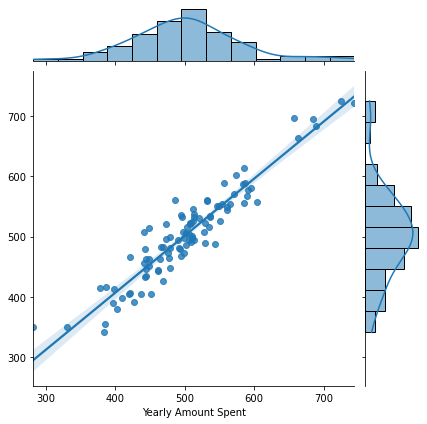

In [376]:
sns.jointplot(Y_test, y_test_predict, kind="reg")

#### Which model has better performance?

Write your answer here:

It's better to use multivariable model because it can be justified better than only once





**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customer.**

Write your answer here:

time on app is related to Lenth of membership, therefore, they must focus on App market and improve the service






